# This submission belongs to Abhigyan 1CR19CS004
Question: Write a Python program to calculate clusters using the Hierarchical Clustering
method. Perform Text analysis using topic modeling algorithms.

#Part A
#Heirarical Clustering


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [18]:
dataset = pd.read_csv('Fitness_Data.csv')

In [19]:
dataset.head()

,CustomerID,Gender,Age,BMI,Hours Spent Exercising,Money spent on fitness,Body Rating
0,2,Male,21,21,5,15,81
1,5,Female,31,23,3,17,40
2,6,Female,22,30,2,17,76
3,8,Female,23,25,3,18,94
4,9,Male,64,25,4,19,3


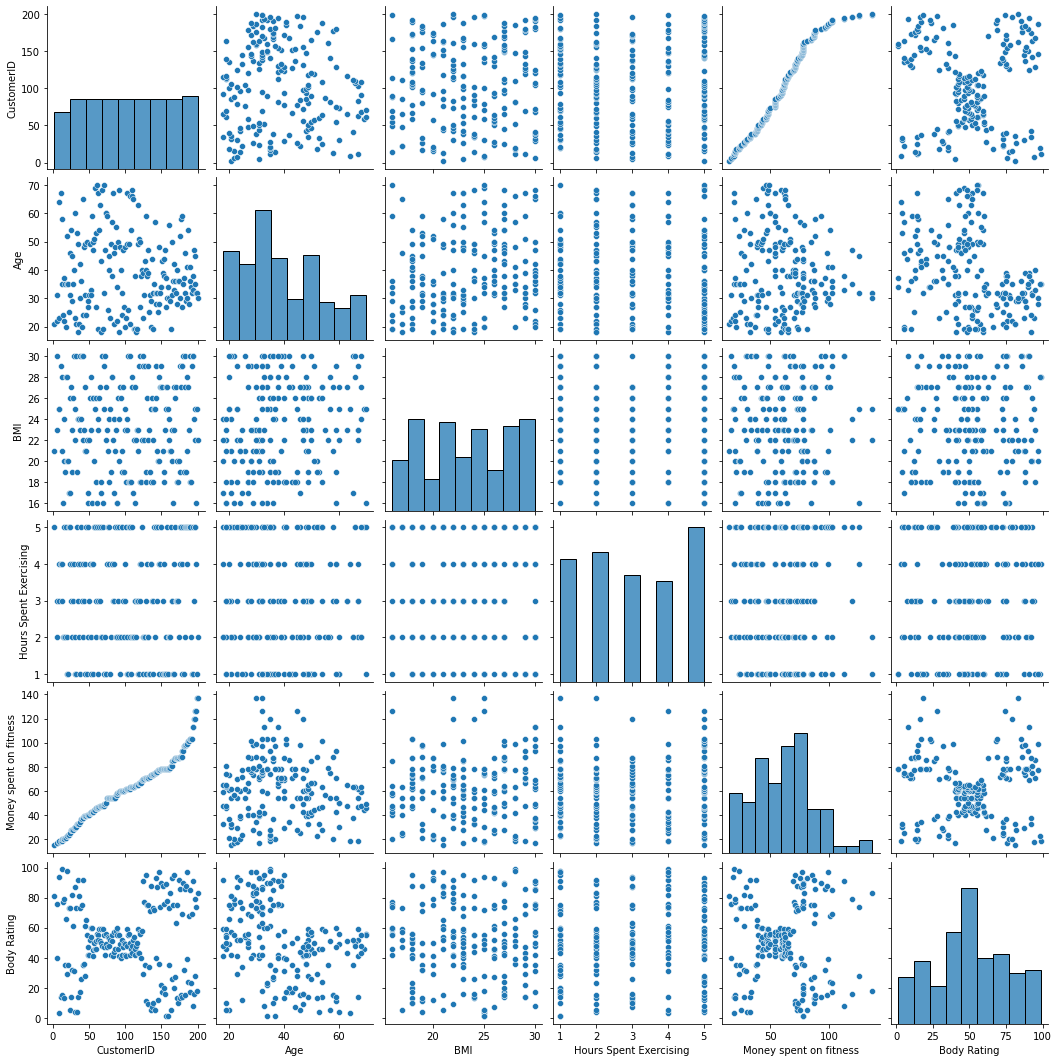

In [20]:
sns.pairplot(dataset)

In [21]:
X = dataset.iloc[:,[5,6]].values #select a specific row or column from the data set

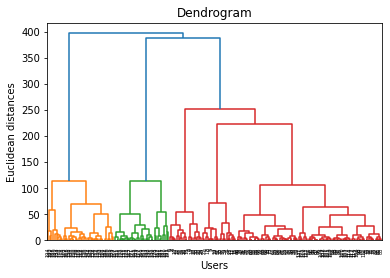

In [22]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Users')
plt.ylabel('Euclidean distances')
plt.show()

#Fitting hierarchical clustering to the Fitness dataset
There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
algorithm class

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')


In [24]:
y_hc = hc.fit_predict(X)

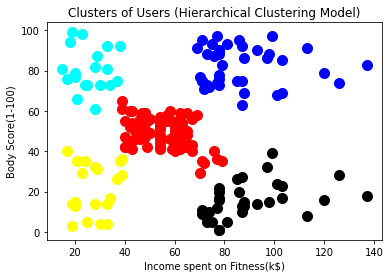

In [25]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='black', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='red', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='yellow', label='Cluster 5')
plt.title('Clusters of Users (Hierarchical Clustering Model)')
plt.xlabel('Income spent on Fitness(k$)')
plt.ylabel('Body Score(1-100)')
plt.show()

From this cluster we can infer that:
<br> Green: High Income vs Low Body score => lazy or not intersested
<br> Red: Normal Income vs Normal Body score => Standard
<br> Blue: High Income vs High Body score => Target
<br> Purple: Low Income vs High Body score => Hard Working
<br> Orange: Low Income vs Low Body score => Not able to afford workouts

#Text analysis using topic modelling

In [31]:
import pandas as pd
import os

In [38]:
reviews  = pd.read_csv('Amazon_Consumer_Reviews.csv')

In [28]:
reviews.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0.0,4.0,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3.0,5.0,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0.0,5.0,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [39]:
#Cleaning
reviews = reviews.drop(columns=['id', 'name', 'categories'], axis=1).sample(100)

# Print out the first rows of reviews
reviews.head()

,dateAdded,dateUpdated,asins,brand,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews_text,reviews.title,reviews.username,sourceURLs
329,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,B010CEHQTG,Amazon,"Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",Amazon,B010CEHQTG,2017-12-24T00:00:00.000Z,...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,Amazon has made another great product! The ‚Äú...,Perfect gift for a parent with memory challenges!,Stromboli,https://reviews.bestbuy.com/3545/5875664/revie...
58,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,B00ZV9PXP2,Amazon,Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-30T00:00:00.000Z,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,This is a great way to read books on the go. T...,Great E-Reader,KEBB,https://www.newegg.com/Product/Product.aspx%25...
140,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,B010CEHQTG,Amazon,"Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",Amazon,B010CEHQTG,2018-01-05T00:00:00.000Z,...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,By far my favorite Amazon product. I bought on...,Great product.,Psmithph3,https://reviews.bestbuy.com/3545/5875664/revie...
30,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,B00ZV9PXP2,Amazon,Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-08-26T00:00:00.000Z,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,My fianc√©e really enjoyes it! I would definit...,Great product,Jeff,https://www.newegg.com/Product/Product.aspx%25...
290,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,B010CEHQTG,Amazon,"Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",Amazon,B010CEHQTG,2017-12-22T00:00:00.000Z,...,2018-04-26T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5875664/revie...,I do like the Alexa stuff and how it can conne...,Pretty cool,LisaOpinion,https://reviews.bestbuy.com/3545/5875664/revie...


In [40]:
import re

#remove punctuation
reviews['text_processed'] = \
reviews['reviews_text'].map(lambda x: re.sub('[,\.!?]','',x)) # removing special symbols


In [41]:
#convert to lower case and print first rows
reviews['text_processed'] = \
reviews['text_processed'].map(lambda x: x.lower())
reviews['text_processed'].head()

329    amazon has made another great product the ‚äús...
58     this is a great way to read books on the go th...
140    by far my favorite amazon product i bought one...
30     my fianc√©e really enjoyes it i would definite...
290    i do like the alexa stuff and how it can conne...
Name: text_processed, dtype: object

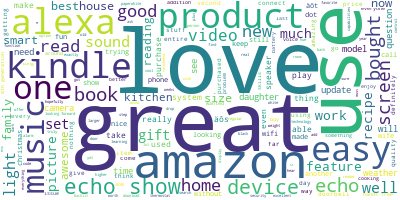

In [42]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(reviews['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [43]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = reviews.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['amazon', 'made', 'another', 'great', 'product', 'aushow', 'au', 'goes', 'perfectly', 'kitchen', 'recipes', 'musicweather', 'done', 'hands', 'free', 'fast', 'set']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words # a group presenting multiple collections of text documents

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [45]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"easy" + 0.016*"good" + 0.015*"read" + 0.013*"books" + '
  '0.013*"product" + 0.010*"size" + 0.010*"used" + 0.010*"alexa" + 0.010*"set" '
  '+ 0.007*"take"'),
 (1,
  '0.024*"great" + 0.016*"one" + 0.016*"kindle" + 0.012*"would" + 0.011*"easy" '
  '+ 0.011*"gift" + 0.010*"th" + 0.010*"generation" + 0.009*"device" + '
  '0.009*"product"'),
 (2,
  '0.041*"echo" + 0.019*"love" + 0.016*"alexa" + 0.016*"show" + 0.015*"one" + '
  '0.013*"home" + 0.012*"mine" + 0.012*"three" + 0.012*"awesome" + '
  '0.010*"smart"'),
 (3,
  '0.022*"kindle" + 0.017*"love" + 0.016*"great" + 0.014*"bought" + '
  '0.011*"reading" + 0.010*"one" + 0.010*"books" + 0.009*"much" + '
  '0.009*"product" + 0.009*"music"'),
 (4,
  '0.016*"good" + 0.015*"kindle" + 0.011*"easy" + 0.010*"calls" + '
  '0.010*"light" + 0.008*"even" + 0.008*"device" + 0.008*"bought" + '
  '0.008*"making" + 0.008*"weather"'),
 (5,
  '0.020*"screen" + 0.010*"purchase" + 0.010*"family" + 0.010*"enjoy" + '
  '0.009*"nothing" + 0.009*"gr